<a href="https://colab.research.google.com/github/prithviemmidi/LifeSatisfaction_Analysis/blob/main/life_satisfaction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/lifesat_csv.csv"
df = pd.read_csv(path)
df.head()

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
0,68035365,45,1981.589,1,0,0,0,0,0,1,...,0,0,0.00000,2025,1.134772,1.7147,1.33485,0.318156,-0.471428,1
1,68035365,46,2110.081,1,0,0,0,0,0,1,...,0,0,33.33333,2116,1.134772,1.7147,1.33485,0.318156,-0.471428,2
2,68035365,46,2351.826,1,0,0,0,0,0,1,...,0,0,66.66666,2116,1.134772,1.7147,1.33485,0.318156,-0.471428,3
3,68035365,48,2219.140,1,0,0,0,0,0,1,...,0,0,66.66666,2304,1.134772,1.7147,1.33485,0.318156,-0.471428,4
4,68035365,49,2498.854,1,0,0,0,0,0,1,...,0,0,50.00000,2401,1.134772,1.7147,1.33485,0.318156,-0.471428,5


In [ ]:
df.shape

(25128, 32)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pidp                   25128 non-null  int64  
 1   agenew                 25128 non-null  int64  
 2   incomecpi              25128 non-null  float64
 3   male                   25128 non-null  int64  
 4   neduc                  25128 non-null  int64  
 5   ueduc                  25128 non-null  int64  
 6   oheduc                 25128 non-null  int64  
 7   Alevel                 25128 non-null  int64  
 8   gcse                   25128 non-null  int64  
 9   otheduc                25128 non-null  int64  
 10  single                 25128 non-null  int64  
 11  married                25128 non-null  int64  
 12  others                 25128 non-null  int64  
 13  selfemploy             25128 non-null  int64  
 14  employed               25128 non-null  int64  
 15  un

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
count,2.512800e+04,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,...,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,4.254653e+08,52.281797,4085.248531,0.436008,0.086796,0.218322,0.113976,0.205548,0.276226,0.099132,...,0.393545,0.059296,70.675476,2915.440823,-0.007413,-0.018481,-0.050689,-0.013047,0.048860,12.500000
std,2.433430e+08,13.493026,2994.112986,0.495898,0.281541,0.413115,0.317789,0.404109,0.447139,0.298846,...,0.488546,0.236183,20.959592,1434.989396,0.946997,0.970549,0.968011,0.993254,0.919429,6.922324
min,6.803536e+07,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,324.000000,-2.727849,-1.783065,-4.550178,-2.750603,-3.231943,1.000000
25%,2.053444e+08,43.000000,2209.953000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,66.666660,1849.000000,-0.410277,-1.083512,-0.626826,-0.449034,-0.471428,6.750000
50%,4.097122e+08,52.000000,3486.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,83.333340,2704.000000,0.362247,-0.383959,0.354012,0.318156,0.448744,12.500000
75%,6.154388e+08,62.000000,5209.436000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,83.333340,3844.000000,0.362247,0.315594,0.354012,0.318156,0.448744,18.250000
max,8.200304e+08,96.000000,173162.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000000,9216.000000,1.907296,2.414253,1.334850,1.852535,1.368915,24.000000


Sorting Into Categorical Variables

In [ ]:
df["genders"] = df["male"].map({0: "Female", 1: "Male"})
df['marital_status'] = df[['single','married','others']].idxmax(axis=1)
df['employment_status'] = df[['selfemploy','employed','unemploy','retired','sick','familycare','student']].idxmax(axis=1)
df['household_size'] = df[['onemember','twomember','member34','othersize']].idxmax(axis=1)

In [ ]:
df['education'] = df[['neduc','ueduc','oheduc','Alevel','gcse','otheduc']].idxmax(axis=1)
education_labels = {
    'neduc': 'None',
    'gcse': 'GCSE',
    'Alevel': 'A-level',
    'otheduc': 'Other ',
    'ueduc': 'University',
    'oheduc': 'Other Higher'}
df['education'] = df['education'].map(education_labels)

In [ ]:
traits = [
    'openness_std',
    'neuroticism_std',
    'agreeableness_std',
    'extraversion_std',
    'conscientiousness_std']

Life Satisfaction vs Gender analsysis

In [ ]:
df['pomst'].describe()

,pomst
count,25128.000000
mean,70.675476
std,20.959592
min,0.000000
25%,66.666660
50%,83.333340
75%,83.333340
max,100.000000


In [ ]:
df['genders'].describe()

,genders
count,25128
unique,2
top,Female
freq,14172


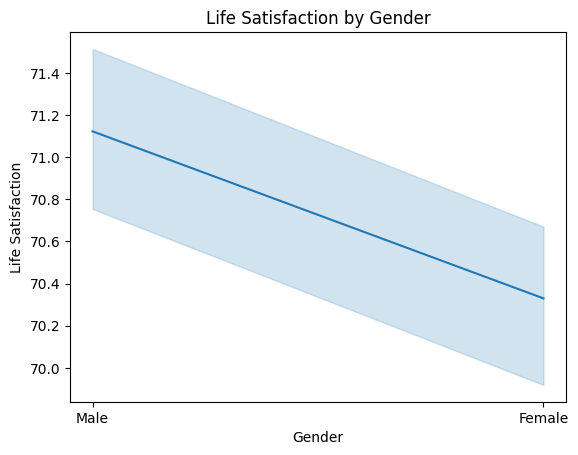

In [ ]:
plt.figure
sns.lineplot(x='genders', y='pomst', data=df)
plt.title("Life Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Life Satisfaction")
plt.show()

/tmp/ipython-input-742667224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genders', y='pomst', data=df, palette="Set2")


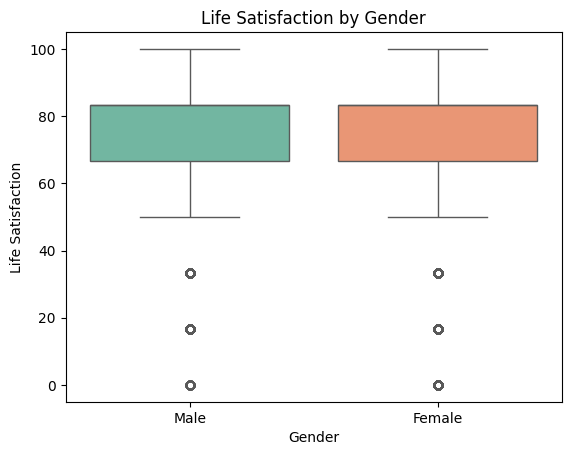

In [ ]:
plt.figure
sns.boxplot(x='genders', y='pomst', data=df, palette="Set2")
plt.title("Life Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Life Satisfaction")
plt.show()

Personality Trait insights

In [ ]:
df[traits].describe()

,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std
count,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,-0.007413,-0.018481,-0.050689,-0.013047,0.048860
std,0.946997,0.970549,0.968011,0.993254,0.919429
min,-2.727849,-1.783065,-4.550178,-2.750603,-3.231943
25%,-0.410277,-1.083512,-0.626826,-0.449034,-0.471428
50%,0.362247,-0.383959,0.354012,0.318156,0.448744
75%,0.362247,0.315594,0.354012,0.318156,0.448744
max,1.907296,2.414253,1.334850,1.852535,1.368915


In [ ]:
df[traits + ['pomst']].corr()

,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,pomst
openness_std,1.000000,-0.078207,0.218126,0.250190,0.178012,0.055662
neuroticism_std,-0.078207,1.000000,-0.079038,-0.210500,-0.140067,-0.244859
agreeableness_std,0.218126,-0.079038,1.000000,0.183520,0.329575,0.089072
extraversion_std,0.250190,-0.210500,0.183520,1.000000,0.227835,0.107314
conscientiousness_std,0.178012,-0.140067,0.329575,0.227835,1.000000,0.104409
pomst,0.055662,-0.244859,0.089072,0.107314,0.104409,1.000000


In [ ]:
df[traits + ['pomst']].corr()['pomst'].drop('pomst')

,pomst
openness_std,0.055662
neuroticism_std,-0.244859
agreeableness_std,0.089072
extraversion_std,0.107314
conscientiousness_std,0.104409


Neuroticism - Strongest relationship with life
satisfaction (though still only weak-moderate) *& only instance of negative correlation*.

Higher neuroticism = lower life satisfaction

All the other personality traits (Openness, Agreeableness, Extraversion & Conscientiousness) have weak positive correlation, with openness having the weakest relationship


In [ ]:
df['neuroticism_std'].unique()

array([ 1.7147   ,  0.3155939, -0.3839591,  1.015147 , -1.083512 ,
       -1.783065 ,  2.414253 ])

From this, I understood that there are only 7 distinct values within neuroticism traits - from further research i believe they're classified from strongly disagree to strongly agree

In [ ]:
neuroticism_map = {
    -1.783065: "Strongly disagree",
    -1.083512: "Disagree",
    -0.3839591: "Somewhat disagree",
     0.3155939: "Neutral",
     1.015147: "Somewhat agree",
     1.7147: "Agree",
     2.414253: "Strongly agree"}

df['neuroticism_scale'] = df['neuroticism_std'].map(neuroticism_map)

In [ ]:
df['openness_std'].unique()

array([ 1.134772 , -0.4102768, -1.955325 ,  0.3622474,  1.907296 ,
       -1.182801 , -2.727849 ])

In [ ]:
openness_map = {
    -2.727849: "Strongly disagree",
    -1.955325: "Disagree",
    -1.182801: "Somewhat disagree",
    -0.4102768: "Neutral",
     0.3622474: "Somewhat agree",
     1.134772: "Agree",
     1.907296: "Strongly agree"
}

df['openness_scale'] = df['openness_std'].map(openness_map)

In [ ]:
df['agreeableness_std'].unique()

array([ 1.33485  , -0.6268257,  0.3540122, -1.607664 , -2.588502 ,
       -3.56934  , -4.550178 ])

In [ ]:
agreeableness_map = {
    -4.550178: "Strongly disagree",
    -3.56934: "Disagree",
    -2.588502: "Somewhat disagree",
    -1.607664: "Neutral",
    -0.6268257: "Somewhat agree",
     0.3540122: "Agree",
     1.33485: "Strongly agree"
}

df['agreeableness_scale'] = df['agreeableness_std'].map(agreeableness_map)

In [ ]:
df['extraversion_std'].unique()

array([ 0.3181558, -0.449034 ,  1.085346 ,  1.852535 , -1.216224 ,
       -1.983413 , -2.750603 ])

In [ ]:
extraversion_map = {
    -2.750603: "Strongly disagree",
    -1.983413: "Disagree",
    -1.216224: "Somewhat disagree",
    -0.449034: "Neutral",
     0.3181558: "Somewhat agree",
     1.085346: "Agree",
     1.852535: "Strongly agree"
}

df['extraversion_scale'] = df['extraversion_std'].map(extraversion_map)

In [ ]:
df['conscientiousness_std'].unique()

array([-0.4714279,  1.368915 ,  0.4487438, -2.311771 , -1.3916   ,
       -3.231943 ])

In [ ]:
conscientiousness_map = {
    -3.231943: "Strongly disagree",
    -2.311771: "Disagree",
    -1.3916: "Somewhat disagree",
    -0.4714279: "Somewhat agree",
     0.4487438: "Agree",
     1.368915: "Strongly agree"
}

df['conscientiousness_scale'] = df['conscientiousness_std'].map(conscientiousness_map)

In [ ]:
scale_order = [
    "Strongly disagree","Disagree","Somewhat disagree",
    "Neutral","Somewhat agree","Agree","Strongly agree"]


---



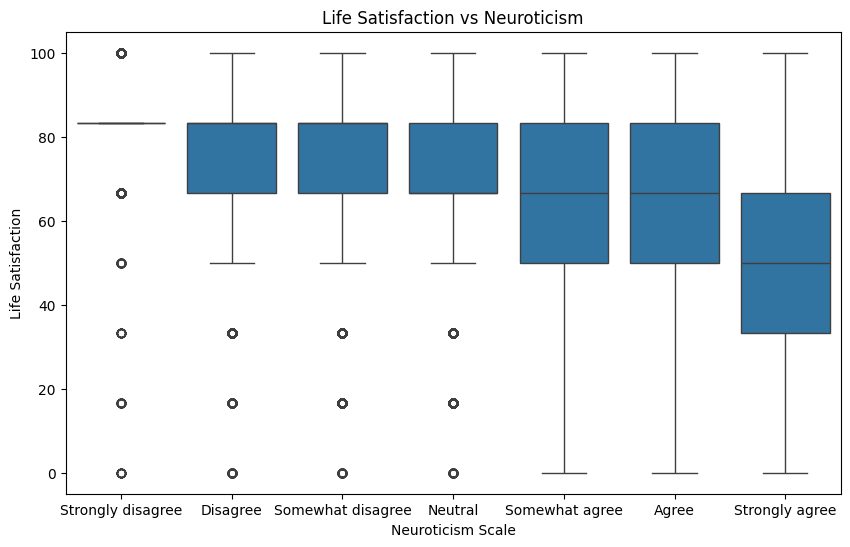

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='neuroticism_scale',
    y='pomst',
    data=df,
    order = scale_order)
plt.xlabel("Neuroticism Scale")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs Neuroticism")
plt.show()

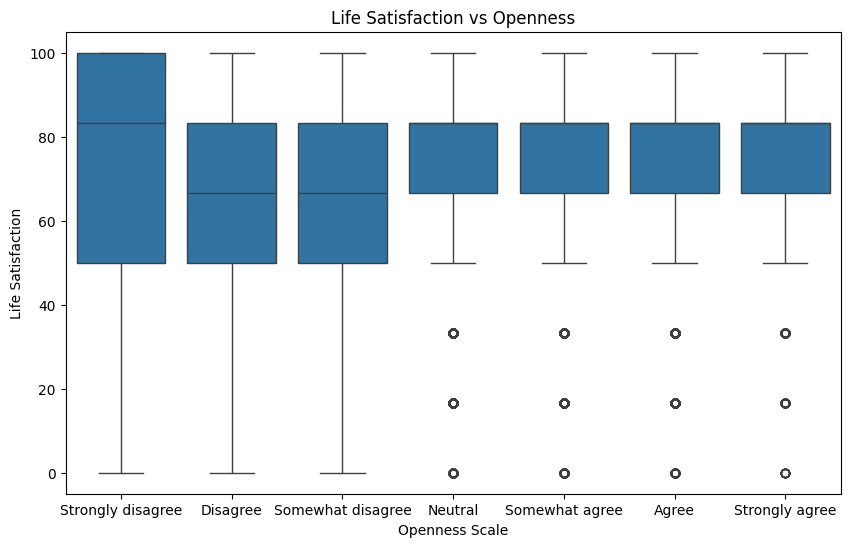

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='openness_scale',
    y='pomst',
    data=df,
    order = scale_order)
plt.xlabel("Openness Scale")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs Openness")
plt.show()

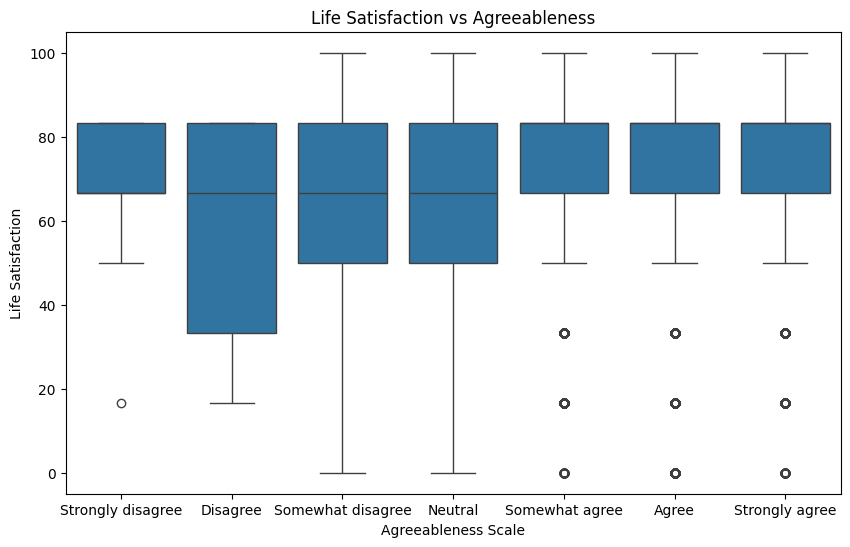

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='agreeableness_scale',
    y='pomst',
    data=df,
    order=scale_order
)
plt.xlabel("Agreeableness Scale")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs Agreeableness")
plt.show()

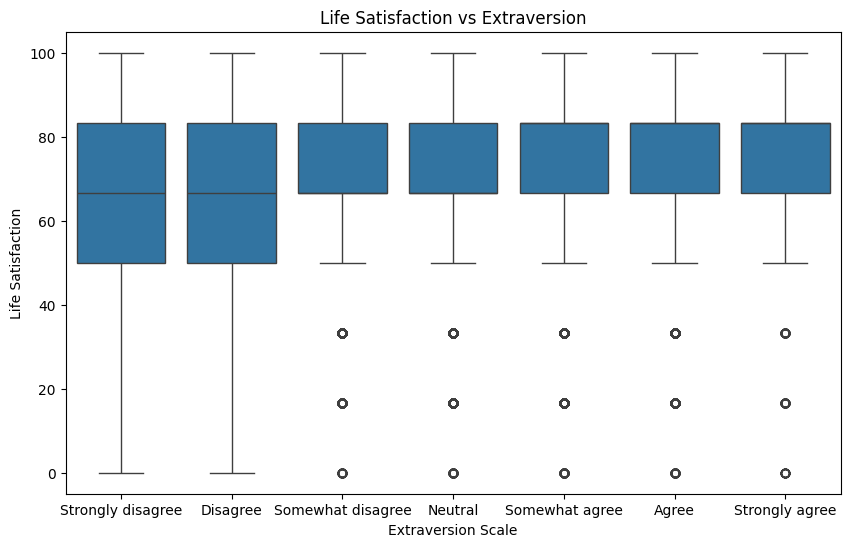

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='extraversion_scale',
    y='pomst',
    data=df,
    order=scale_order
)
plt.xlabel("Extraversion Scale")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs Extraversion")
plt.show()

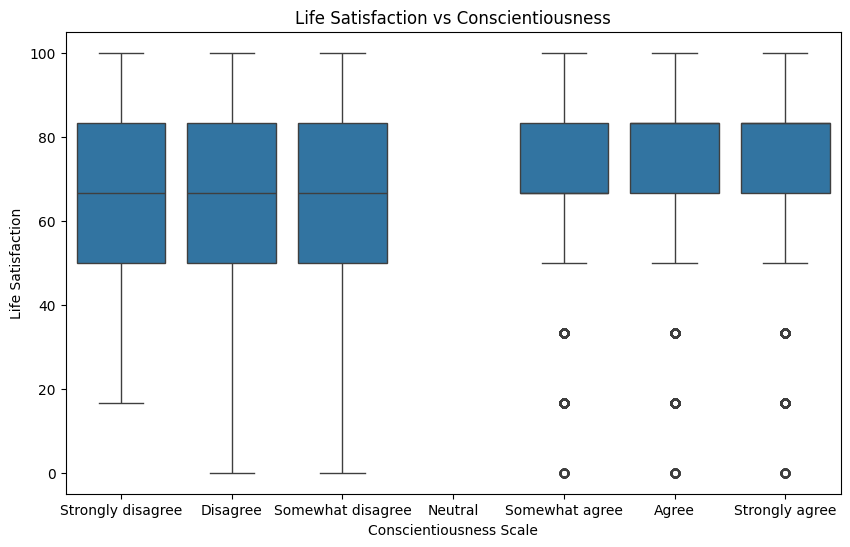

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='conscientiousness_scale',
    y='pomst',
    data=df,
    order=scale_order
)
plt.xlabel("Conscientiousness Scale")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs Conscientiousness")
plt.show()

In [ ]:
df['conscientiousness_scale'].value_counts()

,count
conscientiousness_scale,
Agree,10128
Somewhat agree,7056
Strongly agree,4248
Somewhat disagree,3048
Disagree,576
Strongly disagree,72


In [ ]:
df['neuroticism_scale'].value_counts()

,count
neuroticism_scale,
Neutral,6744
Somewhat disagree,6072
Disagree,5280
Somewhat agree,3528
Agree,1632
Strongly disagree,1296
Strongly agree,576


In [ ]:
traits_table = pd.concat([
    df['openness_scale'].value_counts(),
    df['neuroticism_scale'].value_counts(),
    df['agreeableness_scale'].value_counts(),
    df['extraversion_scale'].value_counts(),
    df['conscientiousness_scale'].value_counts()], axis=1)

traits_table.columns = [
    'Openness',
    'Neuroticism',
    'Agreeableness',
    'Extraversion',
    'Conscientiousness']

traits_table

,Openness,Neuroticism,Agreeableness,Extraversion,Conscientiousness
Somewhat agree,7368,3528,6840,7728,7056.0
Neutral,7224,6744,2664,6744,NaN
Agree,4416,1632,10848,3912,10128.0
Somewhat disagree,3840,6072,648,3480,3048.0
Strongly agree,1104,576,4056,1800,4248.0
Disagree,960,5280,48,1200,576.0
Strongly disagree,216,1296,24,264,72.0




---



In [ ]:
household_member_order = [
    'onemember',
    'twomember',
    'member34',
    'othersize']

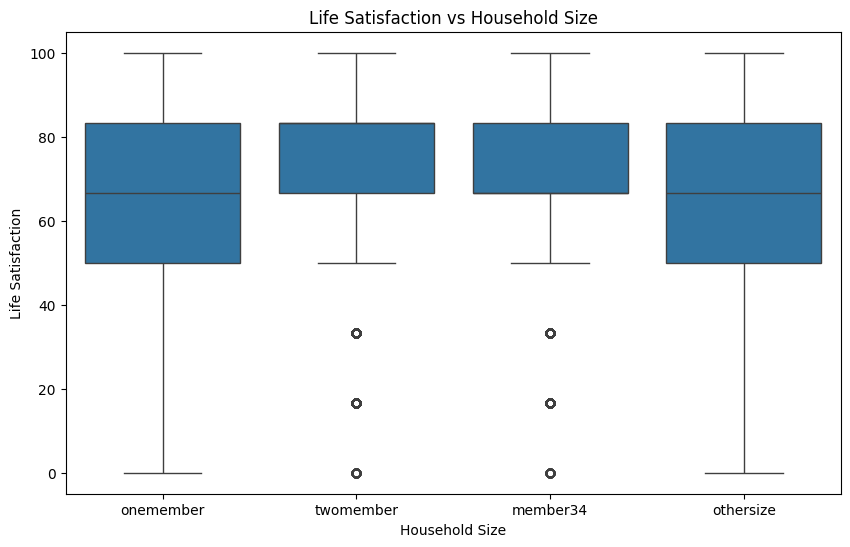

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='household_size',
    y='pomst',
    data=df,
    order = household_member_order
)
plt.xlabel("Household Size")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs Household Size")
plt.show()

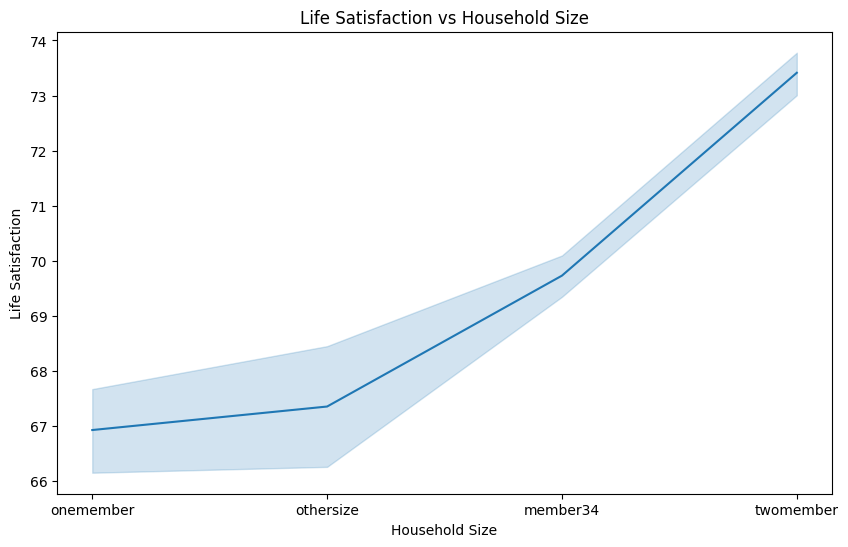

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(
    x='household_size',
    y='pomst',
    data=df
)
plt.xlabel("Household Size")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs Household Size")
plt.show()

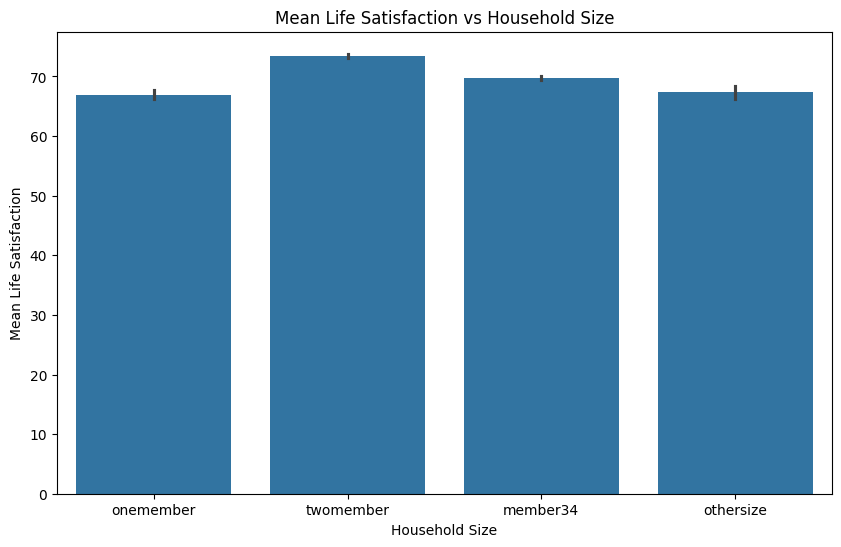

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='household_size',
    y='pomst',
    data=df,
    estimator=np.mean,
    order=['onemember','twomember','member34','othersize'])

plt.xlabel("Household Size")
plt.ylabel("Mean Life Satisfaction")
plt.title("Mean Life Satisfaction vs Household Size")
plt.show()


In [ ]:
household_table = df['household_size'].value_counts()
household_table


,count
household_size,
twomember,10158
member34,9889
onemember,3591
othersize,1490
